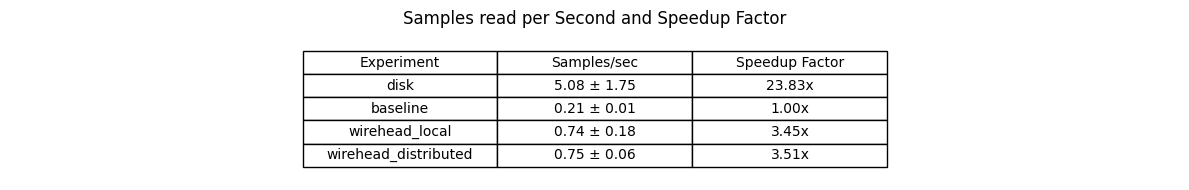

Table has been saved as 'samples_per_second_table.svg'


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_samples_per_second(csv_path):
    df = pd.read_csv(csv_path)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df = df.sort_values('time')
    df['time_diff'] = df['time'].diff().dt.total_seconds()
    df['samples_diff'] = df['samples_read'].diff()
    df['samples_per_second'] = df['samples_diff'] / df['time_diff']
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    avg_samples_per_second = df['samples_per_second'].mean()
    std_samples_per_second = df['samples_per_second'].std()
    return avg_samples_per_second, std_samples_per_second

def create_table_svg(results, output_path):
    fig, ax = plt.subplots(figsize=(12, len(results) * 0.5))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = [[name, value['samples_per_sec'], f"{value['speedup']:.2f}x"] 
                  for name, value in results.items()]
    table = ax.table(cellText=table_data, 
                     colLabels=['Experiment', 'Samples/sec', 'Speedup Factor'],
                     loc='center',
                     cellLoc='center')
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.5, 1.5)
    
    plt.title('Samples read per Second and Speedup Factor', fontsize=12, pad=10)
    plt.tight_layout()
    plt.savefig(output_path, format='svg', bbox_inches='tight', pad_inches=0.5)
    plt.show()
    plt.close()

# example usage
experiments = {
    'disk': 'disk-2024-07-02_17-06/metrics.csv', 
    'baseline': 'baseline-2024-06-26_15-14/metrics.csv',
    'wirehead_local': 'wirehead_train-2024-06-25_20-07/metrics.csv',
    'wirehead_distributed': 'multigpu_gen-2024-06-27_01-37/metrics.csv',
}

results = {}
baseline_avg = None

for name, path in experiments.items():
    avg, std = calculate_samples_per_second(path)
    results[name] = {
        'samples_per_sec': f"{avg:.2f} ± {std:.2f}",
        'avg': avg
    }
    if name == 'baseline':
        baseline_avg = avg

# Calculate speedup factors
for name in results:
    if name == 'baseline':
        results[name]['speedup'] = 1.0
    else:
        results[name]['speedup'] = results[name]['avg'] / baseline_avg

# create and save the table as svg
create_table_svg(results, 'svg/samples_read_per_second_table.svg')

print("Table has been saved as 'samples_per_second_table.svg'")

In [24]:
import pandas as pd
import numpy as np

def calculate_samples_per_second(csv_path):
    df = pd.read_csv(csv_path)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df = df.sort_values('time')
    df['time_diff'] = df['time'].diff().dt.total_seconds()
    df['samples_diff'] = df['samples_read'].diff()
    df['samples_per_second'] = df['samples_diff'] / df['time_diff']
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    avg_samples_per_second = df['samples_per_second'].mean()
    std_samples_per_second = df['samples_per_second'].std()
    return avg_samples_per_second, std_samples_per_second

def create_latex_table(results, output_path):
    latex_table = r"""
\begin{table}[h]
\centering
\begin{tabular}{lcc}
\hline
Experiment & Samples/sec & Speedup Factor \\
\hline
"""
    
    for name, value in results.items():
        latex_table += f"{name} & {value['samples_per_sec']} & {value['speedup']:.2f}x \\\\\n"
    
    latex_table += r"""\hline
\end{tabular}
\caption{Samples per Second and Speedup Factor for Each Experiment}
\label{tab:samples_per_second}
\end{table}
"""
    
    with open(output_path, 'w') as f:
        f.write(latex_table)

# example usage
experiments = {
    'disk': 'disk-2024-07-02_17-06/metrics.csv', 
    'baseline': 'baseline-2024-06-26_15-14/metrics.csv',
    'wirehead\_local': 'wirehead_train-2024-06-25_20-07/metrics.csv',
    'wirehead\_distributed': 'multigpu_gen-2024-06-27_01-37/metrics.csv',
}

results = {}
baseline_avg = None

for name, path in experiments.items():
    avg, std = calculate_samples_per_second(path)
    results[name] = {
        'samples_per_sec': f"{avg:.2f} $\pm$ {std:.2f}",
        'avg': avg
    }
    if name == 'baseline':
        baseline_avg = avg

# Calculate speedup factors
for name in results:
    if name == 'baseline':
        results[name]['speedup'] = 1.0
    else:
        results[name]['speedup'] = results[name]['avg'] / baseline_avg

# create and save the table as latex
create_latex_table(results, 'svg/samples_per_second_table.tex')

print("Latex table has been saved as 'samples_per_second_table.tex'")

Latex table has been saved as 'samples_per_second_table.tex'
